In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import scipy as sp
import math
# import runpy

from sklearn.manifold import MDS

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

In [10]:
val_cat = np.array(val_cat)

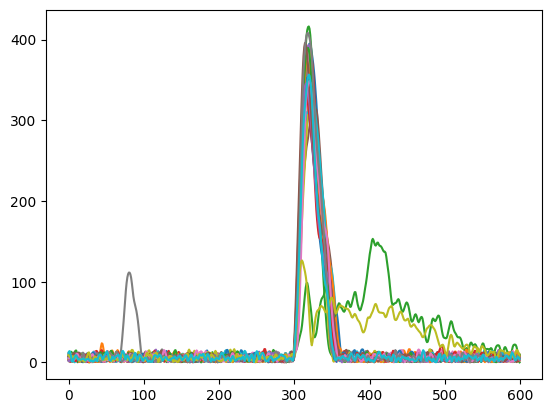

In [9]:
plt.plot(val_cat[0][0].T)

In [16]:
t_val = []
for a in range(8):
    m_val = []
    for b in range(67):
        m_val.append(np.mean(val_cat[b,a], axis=0))

    t_val.append(m_val)

t_val = np.array(t_val)

In [25]:
val_d = np.max(t_val, axis=2)

In [27]:
np.array(val_d).shape

(8, 67)

In [37]:
val_mean = np.mean(val_d, axis=1)
val_sem = np.std(val_d, axis=1) / np.sqrt(np.shape(val_d)[1])

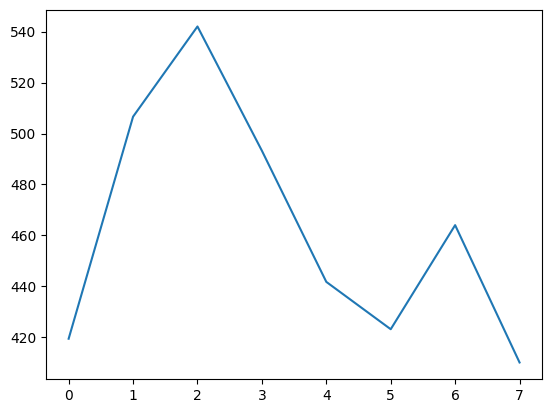

In [38]:
plt.plot(val_mean)

In [63]:
asdf = df(val_d)

In [ ]:
sns.stripplot(val_d[a,:], x=np.arange(0,8,1))

{'whiskers': [<matplotlib.lines.Line2D at 0x2d1f708f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d1f708f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d1f708f390>],
 'medians': [<matplotlib.lines.Line2D at 0x2d1f708f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d1f708fb10>],
 'means': []}

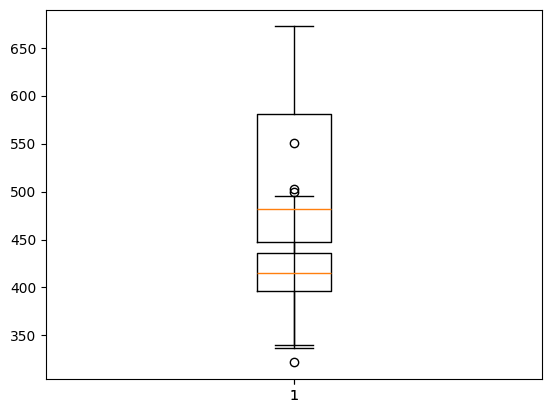

In [74]:
plt.boxplot(val_d[0,:])
plt.boxplot(val_d[1,:])

In [69]:
import seaborn as sns

for a in range(8):
    sns.stripplot(val_d[a,:], x=np.arange(0,8,1))

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

In [71]:
df(val_d)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,336.679567,321.754785,550.963183,483.877309,480.664433,439.040629,429.474774,460.897472,502.979227,424.358890,...,388.872111,386.955034,389.838447,384.487457,433.710620,424.487364,391.806507,341.205419,395.914425,400.663978
1,340.129761,365.375319,601.632239,616.990659,612.512546,615.700754,590.483933,622.028933,672.167730,623.915481,...,455.147179,430.211453,445.893577,466.531708,450.396424,452.338980,424.888421,437.606739,454.142741,456.535603
2,448.958477,444.874759,685.752622,685.805302,712.329644,634.901799,602.062084,660.189801,681.251663,644.202388,...,485.426020,492.099274,486.848748,532.687469,487.265592,472.613300,458.427028,505.631227,513.828256,505.423435
3,412.099741,416.769424,584.641570,610.085265,606.488736,541.341515,570.673075,655.027510,590.023743,577.654711,...,465.522495,454.590782,433.668838,515.954110,484.424332,508.353355,441.255886,469.070320,453.408277,484.883069
4,363.633635,355.654645,555.174297,529.393191,537.833749,435.891545,476.892834,475.719245,502.320558,473.170068,...,408.420835,439.996218,419.839882,452.559080,447.759657,465.283683,407.549089,378.625305,431.136316,439.414622
5,312.819614,323.306330,506.916921,537.828511,537.800419,430.665400,418.786521,468.954689,469.626565,405.269018,...,426.786967,411.448972,451.161798,444.254321,420.316734,436.661245,410.442833,381.621140,384.462748,408.573658
6,369.155774,346.588578,514.665738,556.955111,568.701486,488.717791,436.637470,512.587286,495.770470,435.570819,...,482.490121,487.198522,492.587494,447.006480,494.806530,387.780349,467.834636,489.306818,503.056680,489.911086
7,285.426859,331.904762,487.800933,486.833415,482.708467,452.829868,372.686226,469.706250,487.258349,406.623287,...,418.614122,414.662860,417.053484,436.076721,477.028819,497.241201,415.729630,400.472326,410.194990,445.570245
